In [150]:
import subprocess
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from glob import glob
from pprint import pprint
import os
from plotnine import *
import argparse
import csv
import re
from decimal import *
import json

In [151]:
flagstat_64S_df = pd.read_csv("/hwfssz5/ST_META/P18Z10200N0127_MA/zhujie/sgb_oral/assay/02.rmhost/host_rate/flagstat_64S.tsv", sep='\t')
flagstat_64S_df.columns

Index(['sample_id', 'total_num', 'read_1_num', 'read_2_num', 'mapping_type',
       'mapped_num', 'mapped_rate', 'paired_num', 'paired_rate',
       'singletons_num', 'singletons_rate', 'mate_mapped_num',
       'mate_mapped_num_mapQge5'],
      dtype='object')

In [152]:
flagstat_64S_df.describe()

,total_num,read_1_num,read_2_num,mapped_num,mapped_rate,paired_num,paired_rate,singletons_num,singletons_rate,mate_mapped_num,mate_mapped_num_mapQge5
count,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.808889e+08,9.038983e+07,9.038983e+07,1.387843e+08,0.766466,1.378212e+08,0.761642,57385.156250,0.000317,549693.281250,331529.078125
std,1.269441e+07,6.341781e+06,6.341781e+06,4.134353e+07,0.224212,4.105465e+07,0.222850,26078.043654,0.000140,216807.299801,151705.930667
min,1.633903e+08,8.164061e+07,8.164061e+07,1.688672e+07,0.097900,1.681932e+07,0.097500,18880.000000,0.000100,19646.000000,7053.000000
25%,1.740338e+08,8.696708e+07,8.696708e+07,1.250866e+08,0.727850,1.242446e+08,0.722750,36761.750000,0.000200,455684.500000,266782.000000
50%,1.790252e+08,8.945431e+07,8.945431e+07,1.534193e+08,0.834350,1.522429e+08,0.828700,52459.500000,0.000300,596803.000000,354361.500000
75%,1.871765e+08,9.352332e+07,9.352332e+07,1.668193e+08,0.923475,1.656896e+08,0.916975,75872.250000,0.000400,690743.500000,421849.250000
max,2.394620e+08,1.196856e+08,1.196856e+08,1.997495e+08,0.989300,1.983875e+08,0.983800,127236.000000,0.000700,965830.000000,673551.000000


In [153]:
def sample_site(row):
    if row["sample_id"].endswith("saliva"):
        return "saliva"
    if row["sample_id"].endswith("togue"):
        return "togue"
    else:
        return "other"

In [154]:
rmhost_mapping_df = (flagstat_64S_df.loc[:, ['sample_id', 'mapped_rate', 'paired_rate', 'singletons_rate']]
                       #.sort_values('mapped_rate')
                       .melt(id_vars='sample_id', var_name='mapping', value_name='rate'))
rmhost_mapping_df['sample_site'] = rmhost_mapping_df.apply(sample_site, axis=1)
#rmhost_mapping_df['sample_id'] = rmhost_mapping_df['sample_id'].astype('category')
rmhost_mapping_df.head()

,sample_id,mapping,rate,sample_site
0,RSZYD18187519_A_saliva,mapped_rate,0.7312,saliva
1,RSZYD18187537_A_saliva,mapped_rate,0.3443,saliva
2,RSZYD18078394_A_saliva,mapped_rate,0.5586,saliva
3,RDPYD18088978_A_saliva,mapped_rate,0.9788,saliva
4,RSZYD18187689_A_saliva,mapped_rate,0.7424,saliva


/ldfssz1/ST_META/share/User/zhujie/bioenv/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 16 x 6 in image.
  from_inches(height, units), units))
/ldfssz1/ST_META/share/User/zhujie/bioenv/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: rmhost_64_rate_barplot.pdf
  warn('Filename: {}'.format(filename))


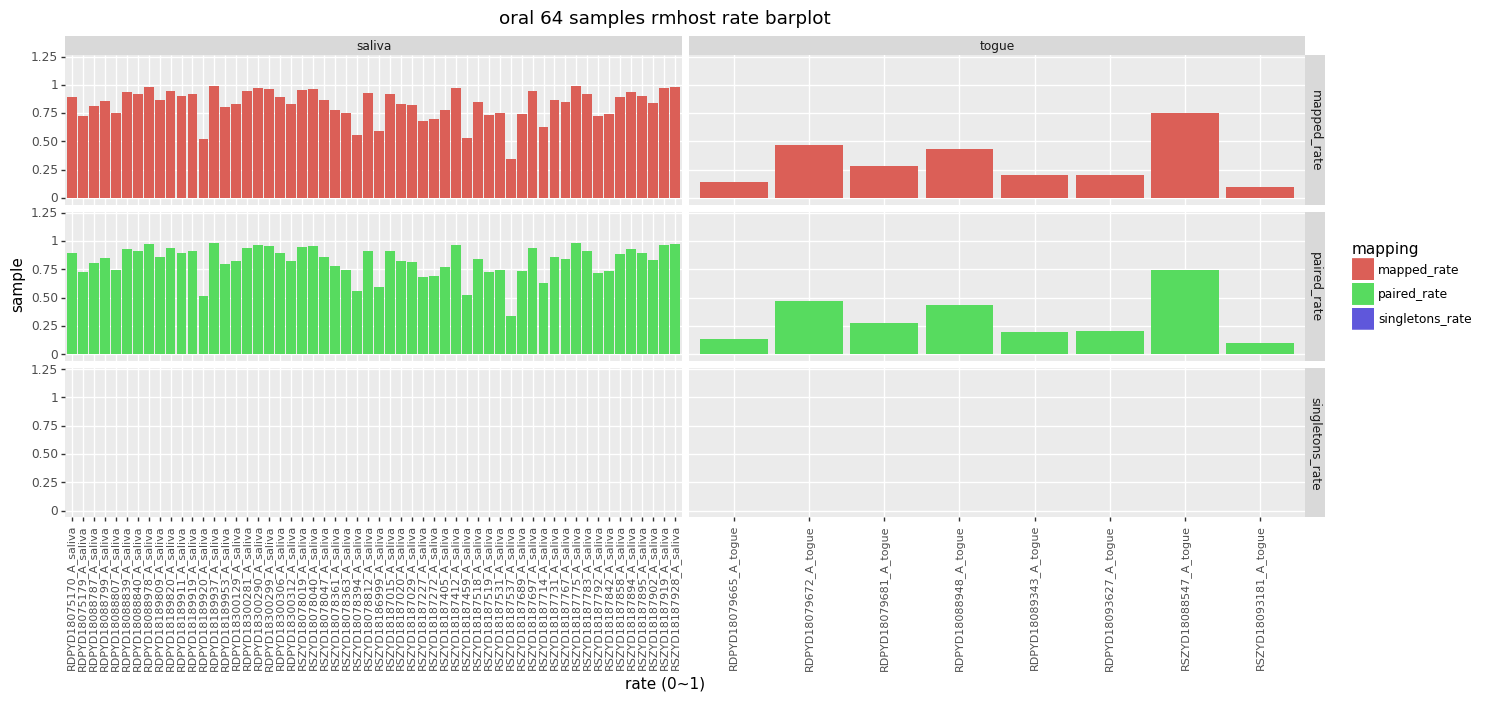

<ggplot: (-9223363271238110681)>

In [185]:
import plotnine
plotnine.options.figure_size = (16, 6)
rmhost_64_rate_barplot =  (ggplot(rmhost_mapping_df, aes(x="sample_id", y="rate", fill="mapping"))
                  + geom_bar(stat="identity", position="dodge")
                  # + coord_flip()
                 #+ geom_text(aes(label='rate'),
                 #            position=dodge_text,
                 #            size=8, va='bottom', format_string='{}%',
                 #            angle=90)
                  + facet_grid('mapping ~ sample_site', scales='free', space='free')
                  + lims(y=(0, 1.2)) 
                  + theme(panel_grid_minor_y = element_blank(),
                          panel_grid_minor_x = element_blank(),
                          axis_text_x = element_text(angle = 90, size = 8))
                  + labs(x="rate (0~1)", y="sample", title = "oral 64 samples rmhost rate barplot"))
rmhost_64_rate_barplot.save("rmhost_64_rate_barplot.pdf")
rmhost_64_rate_barplot

/ldfssz1/ST_META/share/User/zhujie/bioenv/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 6 x 6 in image.
  from_inches(height, units), units))
/ldfssz1/ST_META/share/User/zhujie/bioenv/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: oral_64_samples_rmhost_rate_boxplot.pdf
  warn('Filename: {}'.format(filename))


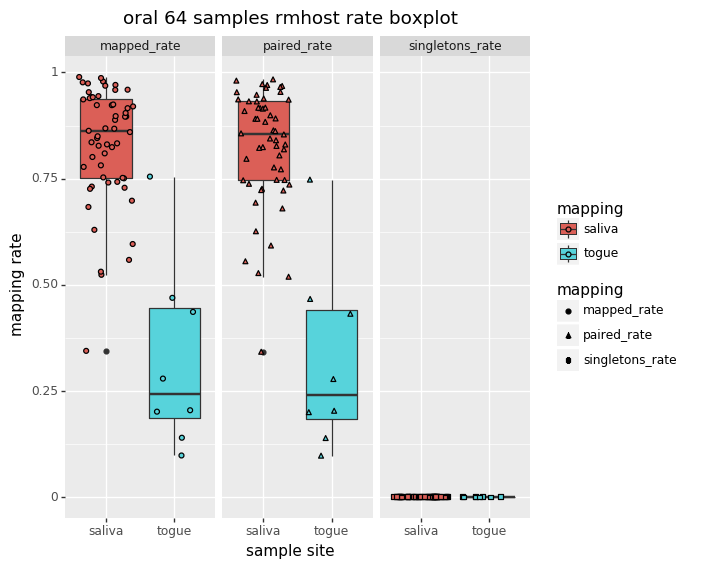

<ggplot: (8765656304178)>

In [186]:
plotnine.options.figure_size = (6, 6)
oral_64_samples_rmhost_rate_boxplot = (ggplot(rmhost_mapping_df, aes(x="sample_site", y="rate", fill="mapping"))
                  + geom_boxplot(aes(fill="sample_site"))
                  + geom_jitter(aes(fill="sample_site", shape="mapping")) #, width=0.1)
                  + facet_wrap('~ mapping')
                  + labs(x="sample site", y="mapping rate", title = "oral 64 samples rmhost rate boxplot"))
oral_64_samples_rmhost_rate_boxplot.save("oral_64_samples_rmhost_rate_boxplot.pdf")
oral_64_samples_rmhost_rate_boxplot

In [157]:
############# choose samples ###############

In [158]:
# < 10%
flagstat_64S_df.query('paired_rate < 0.1')

,sample_id,total_num,read_1_num,read_2_num,mapping_type,mapped_num,mapped_rate,paired_num,paired_rate,singletons_num,singletons_rate,mate_mapped_num,mate_mapped_num_mapQge5
52,RSZYD18093181_A_togue,172540229,86265552,86265552,paired-end,16886717,0.0979,16819320,0.0975,24774,0.0001,19646,7053


In [159]:
# 10% ~ 20%
flagstat_64S_df.query('paired_rate > 0.3 & paired_rate < 0.4')

,sample_id,total_num,read_1_num,read_2_num,mapping_type,mapped_num,mapped_rate,paired_num,paired_rate,singletons_num,singletons_rate,mate_mapped_num,mate_mapped_num_mapQge5
1,RSZYD18187537_A_saliva,188215028,94085001,94085001,paired-end,64798840,0.3443,64396544,0.3422,79130,0.0004,178826,86700


In [160]:
rmhost_sample_df_total = pd.DataFrame(columns=list(flagstat_64S_df.columns) + ["range"])
rmhost_sample_df = pd.DataFrame(columns=list(flagstat_64S_df.columns) + ["range"])
for i in range(0, 10, 1):
    # print((i - 1) / 10, i / 10)
    # print('{} < paired_rate <= {}'.format(i/10, (i+1)/10))
    df = (flagstat_64S_df.query('{} < paired_rate < {}'.format(i/10, (i+1)/10))
                         .sample(n=2, random_state=2, replace=True)
                         .assign(range="({}, {}]".format(i/10, (i+1)/10)))
    df_ = (flagstat_64S_df.query('{} < paired_rate < {}'.format(i/10, (i+1)/10))
                         .assign(range="({}, {}]".format(i/10, (i+1)/10)))
    rmhost_sample_df_total = pd.concat([rmhost_sample_df_total, df])
    rmhost_sample_df = pd.concat([rmhost_sample_df, df])

In [161]:
rmhost_sample_df.sort_values('paired_rate')

,sample_id,total_num,read_1_num,read_2_num,mapping_type,mapped_num,mapped_rate,paired_num,paired_rate,singletons_num,singletons_rate,mate_mapped_num,mate_mapped_num_mapQge5,range
52,RSZYD18093181_A_togue,172540229,86265552,86265552,paired-end,16886717,0.0979,16819320,0.0975,24774,0.0001,19646,7053,"(0.0, 0.1]"
52,RSZYD18093181_A_togue,172540229,86265552,86265552,paired-end,16886717,0.0979,16819320,0.0975,24774,0.0001,19646,7053,"(0.0, 0.1]"
40,RDPYD18079665_A_togue,180631186,90305314,90305314,paired-end,25234832,0.1397,25112874,0.1390,25760,0.0001,48850,19638,"(0.1, 0.2]"
58,RDPYD18089343_A_togue,166151524,83060015,83060015,paired-end,33408180,0.2011,33210550,0.1999,37026,0.0002,76818,28467,"(0.1, 0.2]"
56,RDPYD18093627_A_togue,170654154,85315861,85315861,paired-end,34882363,0.2044,34679044,0.2032,70487,0.0004,67454,28868,"(0.2, 0.3]"
49,RDPYD18079681_A_togue,165942694,82955843,82955843,paired-end,46302290,0.2790,46120226,0.2780,32356,0.0002,76306,29703,"(0.2, 0.3]"
1,RSZYD18187537_A_saliva,188215028,94085001,94085001,paired-end,64798840,0.3443,64396544,0.3422,79130,0.0004,178826,86700,"(0.3, 0.4]"
1,RSZYD18187537_A_saliva,188215028,94085001,94085001,paired-end,64798840,0.3443,64396544,0.3422,79130,0.0004,178826,86700,"(0.3, 0.4]"
30,RDPYD18088948_A_togue,190358555,95107800,95107800,paired-end,82993149,0.4360,82114242,0.4317,83006,0.0004,509024,306026,"(0.4, 0.5]"
47,RDPYD18079672_A_togue,239462016,119685602,119685602,paired-end,112352142,0.4692,111702514,0.4666,93910,0.0004,283070,123522,"(0.4, 0.5]"


In [162]:
choose_rmhost_sample_df = (rmhost_sample_df.drop_duplicates(["sample_id", "paired_rate"])
                                           .assign(r1=lambda x : "/hwfssz5/ST_META/P18Z10200N0127_MA/zhujie/sgb_oral/results/01.trimming/" + x.sample_id + ".trimmed.1.fq.gz",
                                                   r2=lambda x : "/hwfssz5/ST_META/P18Z10200N0127_MA/zhujie/sgb_oral/results/01.trimming/" + x.sample_id + ".trimmed.2.fq.gz"))
choose_rmhost_sample_df.loc[:, ["sample_id", "r1", "r2"]].rename(columns={"sample_id": "id"}).to_csv("samples.tsv", sep='\t', index=False)

In [163]:
# metapi bwa f4 vs f12F256

In [164]:
def flagstats_summary(flagstats, out_file, method):
    """
    get alignment rate from sorted bam file
    samtools -flagstat --threads 8 sample.sort.bam
    """
    headers = [
        'sample_id', 'total_num', 'read_1_num', 'read_2_num', 'mapping_type',
        'mapped_num', 'mapped_rate', 'paired_num', 'paired_rate',
        'singletons_num', 'singletons_rate', 'mate_mapped_num',
        'mate_mapped_num_mapQge5', 'method'
    ]
    mapping_info = []
    getcontext().prec = 8

    # with open(flagstat_list, 'r') as list_handle:
    if method == 1:
        list_handle = open(flagstats, 'r')
    if method == 2:
        list_handle = flagstats

    for flagstat_file in list_handle:
        info = {}
        info['sample_id'] = os.path.basename(flagstat_file.strip()).split('.')[0]
        info['method'] = os.path.basename(flagstat_file.strip()).split('.')[1]
        stat_list = open(flagstat_file.strip(), 'r').readlines()
        info['total_num'] = stat_list[0].split(' ')[0]
        info['read_1_num'] = stat_list[6].split(' ')[0]
        info['read_2_num'] = stat_list[7].split(' ')[0]

        mapped = re.split(r'\(|\s+', stat_list[4])
        info['mapped_num'] = mapped[0]
        info['mapped_rate'] = Decimal(mapped[5].rstrip('%')) / Decimal(100)

        paired = re.split(r'\(|\s+', stat_list[8])
        info['paired_num'] = paired[0]
        paired_rate = paired[6].rstrip('%')
        if paired_rate != "N/A":
            info['paired_rate'] = Decimal(paired_rate) / Decimal(100)
            info['mapping_type'] = "paired-end"
        else:
            info['paired_rate'] = paired_rate
            info["mapping_type"] = "single-end"

        singletons = re.split(r'\(|\s+', stat_list[-3])
        info['singletons_num'] = singletons[0]
        singletons_rate = singletons[5].rstrip('%')
        if singletons_rate != "N/A":
            info['singletons_rate'] = Decimal(singletons_rate) / Decimal(100)
        else:
            info['singletons_rate'] = singletons_rate

        info['mate_mapped_num'] = re.split(r'\(|\s+', stat_list[-2])[0]
        info['mate_mapped_num_mapQge5'] = re.split(r'\(|\s+', stat_list[-1])[0]
        mapping_info.append(info)

    with open(out_file, 'w') as out_handle:
        f_tsv = csv.DictWriter(out_handle, headers, delimiter='\t')
        f_tsv.writeheader()
        f_tsv.writerows(mapping_info)

In [165]:
flagstats_summary(glob("results/*.flagstat.txt"), "sam_flagstat.tsv", 2)

In [166]:
sam_flagstats_df = pd.read_csv("sam_flagstat.tsv", sep='\s+')
sam_flagstats_df.sort_values(["sample_id", "method"]).head()

,sample_id,total_num,read_1_num,read_2_num,mapping_type,mapped_num,mapped_rate,paired_num,paired_rate,singletons_num,singletons_rate,mate_mapped_num,mate_mapped_num_mapQge5,method
43,RDPYD18079665_A_togue,180631189,90305314,90305314,paired-end,25234836,0.1397,25113094,0.1390,25763,0.0001,48770,19612,metapi_bwa_f12F256
65,RDPYD18079665_A_togue,180631189,90305314,90305314,paired-end,25234836,0.1397,25113094,0.1390,25763,0.0001,48770,19612,metapi_bwa_f4
21,RDPYD18079665_A_togue,180631189,90305314,90305314,paired-end,25234836,0.1397,25113094,0.1390,25763,0.0001,48770,19612,metapi_bwa_idfilter
2,RDPYD18079665_A_togue,180631189,90305314,90305314,paired-end,25234836,0.1397,25113094,0.1390,25763,0.0001,48770,19612,sunbeam_bwa
56,RDPYD18079672_A_togue,239462022,119685602,119685602,paired-end,112352161,0.4692,111703450,0.4667,93903,0.0004,282902,123498,metapi_bwa_f12F256


In [167]:
sam_flagstats_df_plot = (sam_flagstats_df.loc[:, ["sample_id", "mapped_rate", "paired_rate", "singletons_rate", "method", "mapped_num"]]
                                              .melt(id_vars=['sample_id', 'method', "mapped_num"], var_name='mapping', value_name='rate'))
sam_flagstats_df_plot['sample_site'] = sam_flagstats_df_plot.apply(sample_site, axis=1)

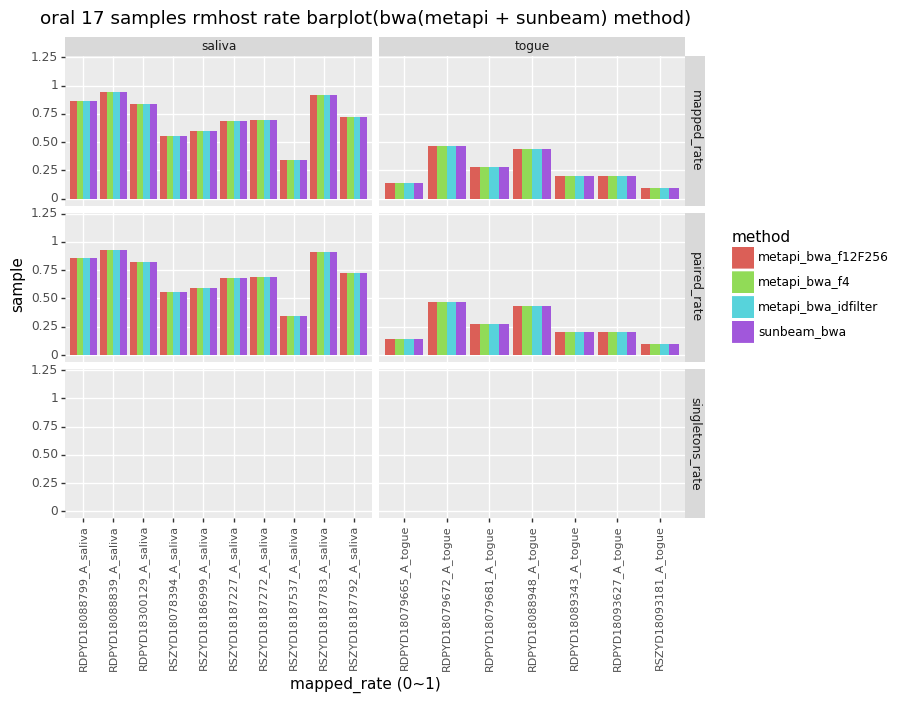

<ggplot: (8765729557459)>

In [168]:
plotnine.options.figure_size = (8, 6)
(ggplot(sam_flagstats_df_plot, aes(x='sample_id', y='rate'))
 + geom_bar(aes(fill='method'), stat='identity', position="dodge")
 + facet_grid('mapping ~ sample_site', scales='free')
 + lims(y=(0, 1.2)) 
 + theme(panel_grid_minor_y = element_blank(),
         panel_grid_minor_x = element_blank(),
         axis_text_x = element_text(angle = 90, size = 8))
 + labs(x="mapped_rate (0~1)", y="sample", title = "oral 17 samples rmhost rate barplot(bwa(metapi + sunbeam) method)"))

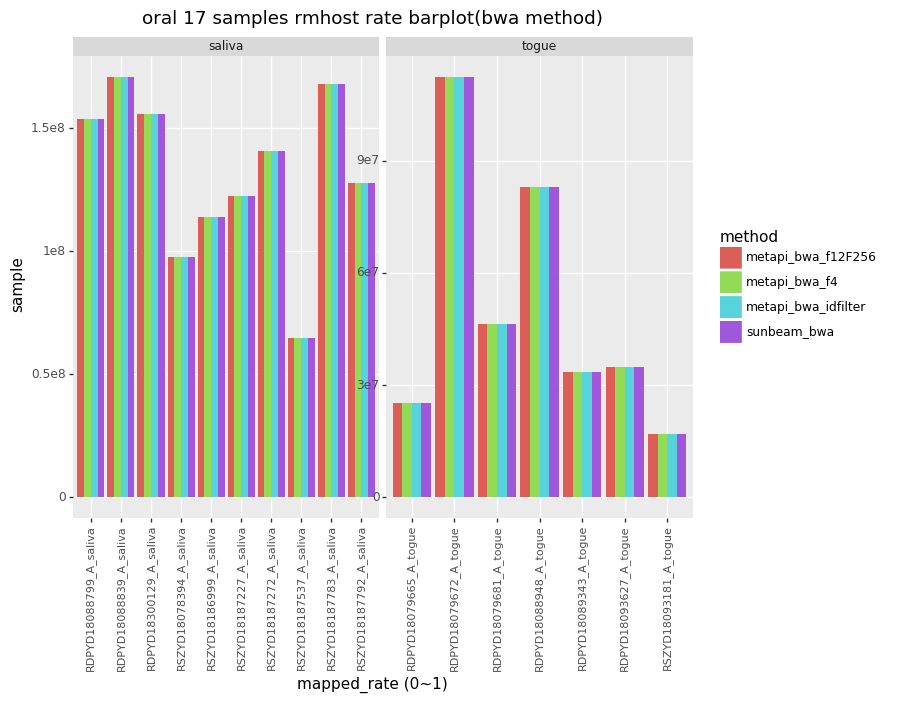

<ggplot: (-9223363270917974980)>

In [169]:
plotnine.options.figure_size = (8, 6)
(ggplot(sam_flagstats_df_plot, aes(x='sample_id', y='mapped_num'))
 + geom_bar(aes(fill='method'), stat='identity', position="dodge")
 + facet_wrap("~ sample_site", scales="free")
 + theme(panel_grid_minor_y = element_blank(),
         panel_grid_minor_x = element_blank(),
         axis_text_x = element_text(angle = 90, size = 8))
 + labs(x="mapped_rate (0~1)", y="sample", title = "oral 17 samples rmhost rate barplot(bwa method)"))

In [170]:
# convert fastp json report to a DataFrame
def extract_df(sample, json_info, key):
    df = pd.io.json.json_normalize(json_info[key])
    df.insert(loc=0, column='sample_id', value=[sample])
    return df

# /hwfssz5/ST_META/P18Z10200N0127_MA/zhujie/sgb_oral/results/01.trimming
fastp_dict = {os.path.basename(i).split(".")[0] : i for i in glob('/hwfssz5/ST_META/P18Z10200N0127_MA/zhujie/sgb_oral/results/01.trimming/*fastp.json')}
# pprint(fastp_dict)
# json file is too larger to parse.
# and the format after add stlfr_barcode_frequency is not right.
# del fastp_dict["gy418v"]
# del fastp_dict["gy581v"]

summary = []
filter_result = []

for sample in list(choose_rmhost_sample_df.sample_id):
    with open(fastp_dict[sample], 'r') as json_h:
        json_info = json.load(json_h)
        # print(json_info.keys())
        summary.append(extract_df(sample, json_info, 'summary'))
        filter_result.append(extract_df(sample, json_info, 'filtering_result'))

summary_df = pd.concat(summary)#.rename(columns={'sample': 'id'})
filter_result_df = pd.concat(filter_result)#.rename(columns={'sample': 'id'})
fqstat = summary_df.merge(filter_result_df)
fqstat["sample_site"] = fqstat.apply(sample_site, axis=1)

In [171]:
oral_17S_trimmed_reads_df = fqstat.loc[:, ['sample_id', 'after_filtering.total_reads', 'sample_site']]
oral_17S_trimmed_reads_df["after_filtering.total_reads"] = oral_17S_trimmed_reads_df["after_filtering.total_reads"] / 2
oral_17S_trimmed_reads_df.head()

,sample_id,after_filtering.total_reads,sample_site
0,RSZYD18093181_A_togue,97799724.0,togue
1,RDPYD18079665_A_togue,101951342.0,togue
2,RDPYD18089343_A_togue,96328188.0,togue
3,RDPYD18079681_A_togue,95242118.0,togue
4,RDPYD18093627_A_togue,96781836.0,togue


In [172]:
for sample in list(choose_rmhost_sample_df.sample_id):
    anvio_reads_count = os.path.join("results", "%s.anvio_bowtie2.rmhost.reads.count.txt" % sample)
    sunbeam_reads_count = os.path.join("results", "%s.sunbeam_bwa.rmhost.reads.count.txt" % sample)
    anvio_mapped_ids_uniq = os.path.join("results", "%s.anvio_bowtie2.mapped.ids.uniq" % sample)
    sunbeam_mapped_ids_uniq = os.path.join("results", "%s.sunbeam_bwa.mapped.ids.uniq" % sample)
    with open(anvio_reads_count, 'w') as oah, open(sunbeam_reads_count, 'w') as osh, open(anvio_mapped_ids_uniq, 'r') as iah, open(sunbeam_mapped_ids_uniq, 'r') as ish:
        trimmed_reads_count = int(oral_17S_trimmed_reads_df.query('sample_id == "%s"' % sample)["after_filtering.total_reads"])
        anvio_mapped_ids_count = int(iah.readline().strip())
        sunbeam_mapped_ids_count = int(ish.readline().strip())
        oah.write("reads_count" + "\n")
        oah.write("%s\n" % (trimmed_reads_count - anvio_mapped_ids_count))
        osh.write("reads_count" + "\n")
        osh.write("%s\n" % (trimmed_reads_count - sunbeam_mapped_ids_count))

In [173]:
def change(table, mapper_, sample_):
    df = pd.DataFrame()
    df = pd.read_csv(table, sep='\s+')
    df.insert(loc=0, column='method', value=[mapper_])
    df.insert(loc=0, column='sample_id', value=[sample_])
    return df

def summary_reads_count(pattern):
    df = pd.DataFrame()
    for reads_count in glob(pattern):
        sample_ = os.path.basename(reads_count).split('.')[0]
        mapper_ = os.path.basename(reads_count).split('.')[1]

        df_ = change(reads_count, mapper_, sample_)
        df = pd.concat([df, df_])
    return df

In [174]:
reads_counts_df = summary_reads_count("results/*reads.count.txt")
reads_counts_df["sample_site"] = reads_counts_df.apply(sample_site, axis=1)

In [175]:
reads_counts_df.sort_values(['sample_id', 'method'])

,sample_id,method,reads_count,sample_site
0,RDPYD18079665_A_togue,anvio_bowtie2,94518900,togue
0,RDPYD18079665_A_togue,gyl_soap,83543004,togue
0,RDPYD18079665_A_togue,metapi_bwa_f12F256,77685295,togue
0,RDPYD18079665_A_togue,metapi_bwa_f4,77698557,togue
0,RDPYD18079665_A_togue,metapi_bwa_idfilter,77685295,togue
0,RDPYD18079665_A_togue,sunbeam_bwa,95036964,togue
0,RDPYD18079672_A_togue,anvio_bowtie2,78933290,togue
0,RDPYD18079672_A_togue,gyl_soap,70308404,togue
0,RDPYD18079672_A_togue,metapi_bwa_f12F256,63507979,togue
0,RDPYD18079672_A_togue,metapi_bwa_f4,63556346,togue


/ldfssz1/ST_META/share/User/zhujie/bioenv/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 12 x 6 in image.
  from_inches(height, units), units))
/ldfssz1/ST_META/share/User/zhujie/bioenv/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: oral_17_samples_reads_count_barplot.pdf
  warn('Filename: {}'.format(filename))


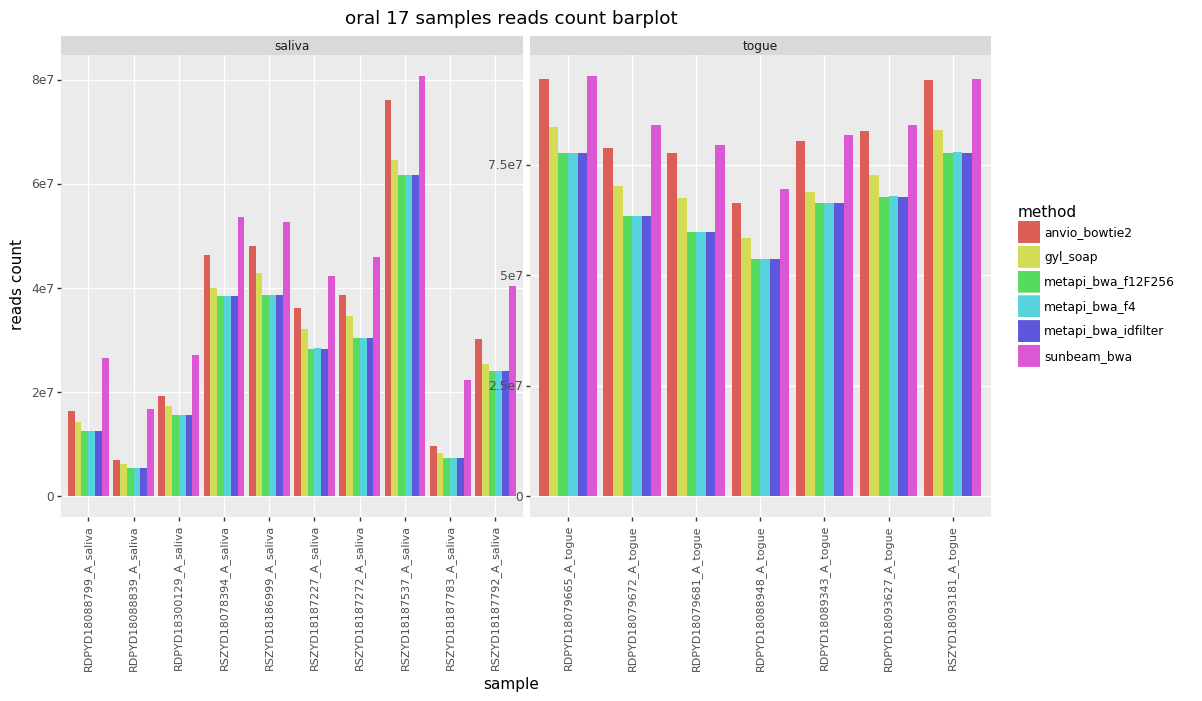

<ggplot: (8765727059846)>

In [187]:
plotnine.options.figure_size = (12, 6)
oral_17_samples_reads_count_barplot = (ggplot(reads_counts_df, aes(x='sample_id', y='reads_count'))
 + geom_bar(aes(fill='method'), stat='identity', position='dodge')
 + facet_wrap('~ sample_site', scales='free')
 + theme(panel_grid_minor_y = element_blank(),
         panel_grid_minor_x = element_blank(),
         axis_text_x = element_text(angle = 90, size = 8))
 + labs(x="sample", y="reads count", title = "oral 17 samples reads count barplot"))
oral_17_samples_reads_count_barplot.save("oral_17_samples_reads_count_barplot.pdf")
oral_17_samples_reads_count_barplot 

In [177]:
benchmark_df = pd.read_csv("benchmark/rmhost.benchmark.tsv", sep='\s+')

In [180]:
benchmark_df.head()

,sample,mapper,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load
0,RSZYD18093181_A_togue,gyl_soap,29974.0114,8:19:34,6438.64,7311.98,6435.00,6435.08,23780.45,13282.30,0.0
1,RSZYD18093181_A_togue,metapi_bwa_f12F256,12096.3640,3:21:36,6425.19,7455.06,6420.71,6421.01,16263.78,13621.01,0.0
2,RSZYD18093181_A_togue,metapi_bwa_f4,11144.7447,3:05:44,6494.65,7455.06,6490.32,6490.53,20938.56,13621.05,0.0
3,RSZYD18093181_A_togue,metapi_bwa_idfilter,14175.5212,3:56:15,6553.64,7578.00,6548.89,6549.09,23199.79,13621.23,0.0
4,RSZYD18093181_A_togue,sunbeam_bwa,11475.3104,3:11:15,11423.88,13841.80,11418.97,11419.17,16062.81,1428.34,0.0


In [181]:
benchmark_df_plot = (benchmark_df.loc[:, ["sample", "mapper", "s", "max_rss", "max_vms", "max_pss", "io_in", "io_out"]]
                                 .melt(id_vars=["sample", "mapper"])
                                 .rename(columns={"sample": "sample_id"}))
benchmark_df_plot["sample_site"] = benchmark_df_plot.apply(sample_site, axis=1)
benchmark_df_plot.head()

,sample_id,mapper,variable,value,sample_site
0,RSZYD18093181_A_togue,gyl_soap,s,29974.0114,togue
1,RSZYD18093181_A_togue,metapi_bwa_f12F256,s,12096.3640,togue
2,RSZYD18093181_A_togue,metapi_bwa_f4,s,11144.7447,togue
3,RSZYD18093181_A_togue,metapi_bwa_idfilter,s,14175.5212,togue
4,RSZYD18093181_A_togue,sunbeam_bwa,s,11475.3104,togue


/ldfssz1/ST_META/share/User/zhujie/bioenv/lib/python3.6/site-packages/plotnine/ggplot.py:708: UserWarning: Saving 10 x 20 in image.
  from_inches(height, units), units))
/ldfssz1/ST_META/share/User/zhujie/bioenv/lib/python3.6/site-packages/plotnine/ggplot.py:709: UserWarning: Filename: benchmark_df_plot.pdf
  warn('Filename: {}'.format(filename))


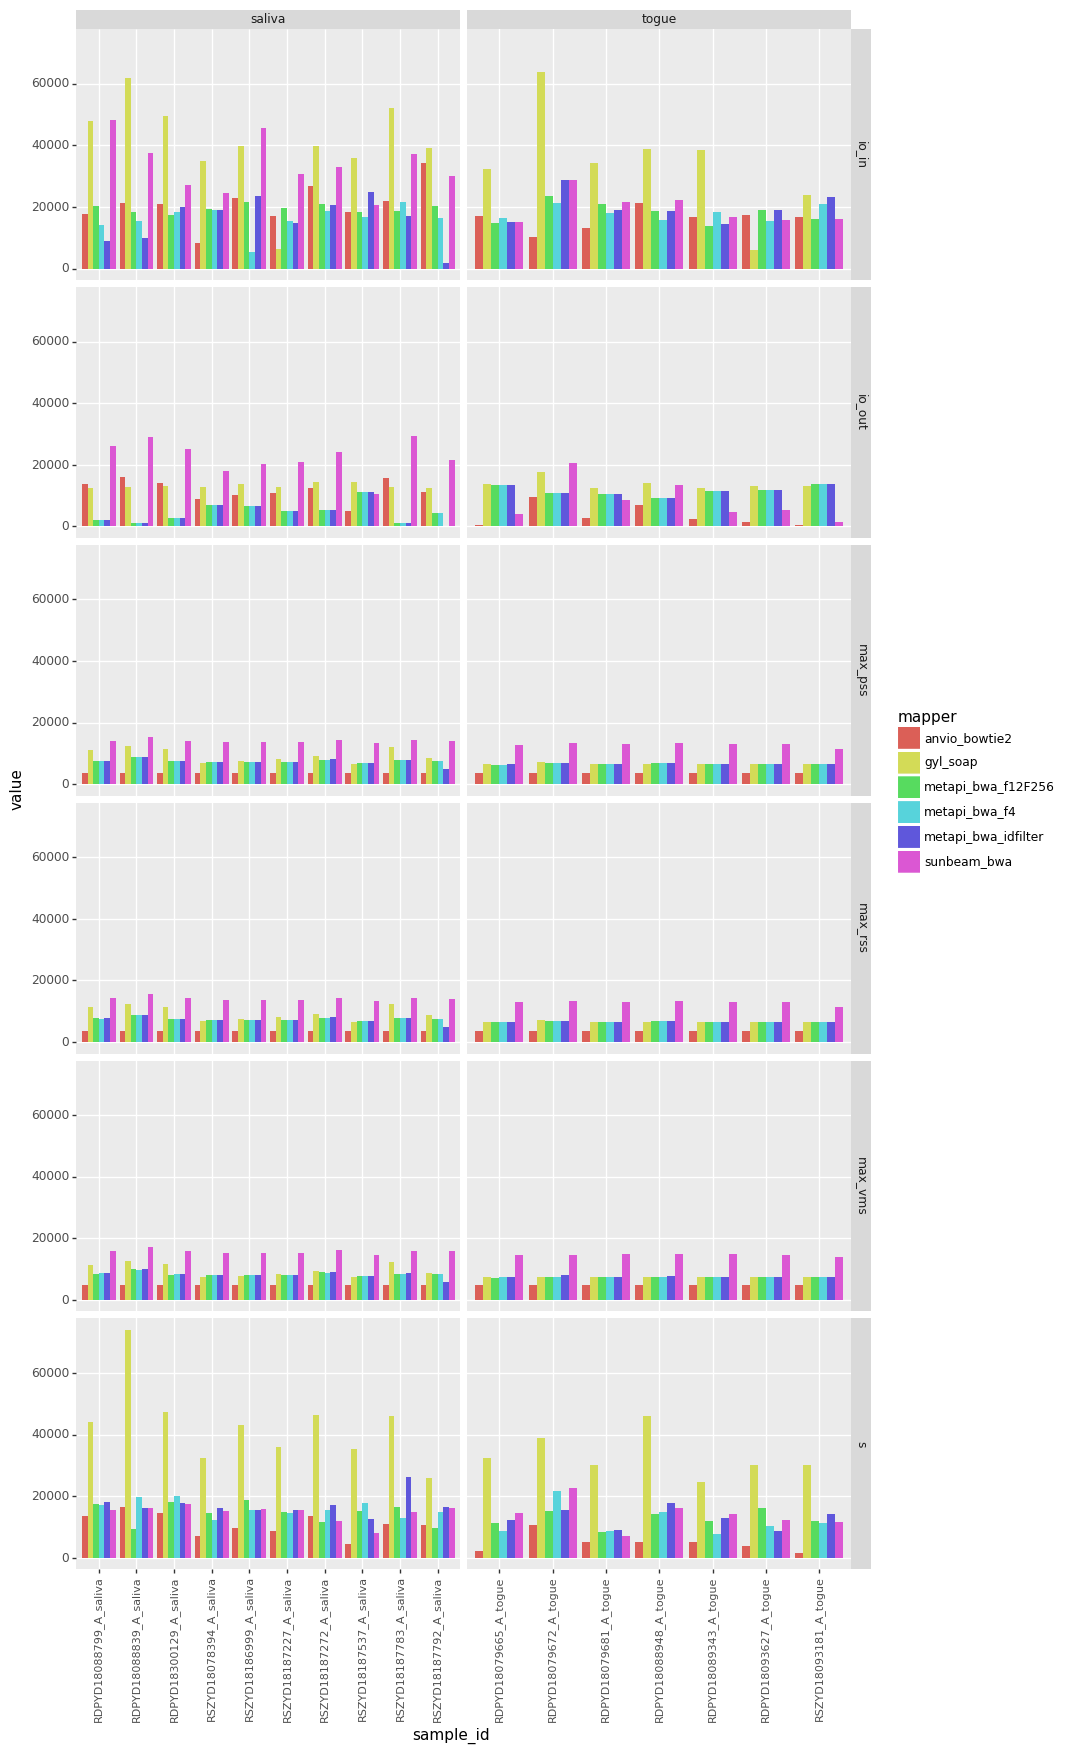

<ggplot: (8765729438237)>

In [188]:
plotnine.options.figure_size = (10, 20)
benchmark_df_plot = (ggplot(benchmark_df_plot, aes(x='sample_id', y='value'))
 + geom_bar(aes(fill='mapper'), stat='identity', position='dodge')
 #+ coord_flip()
 + facet_grid('variable ~ sample_site', scales='free_x')
 + theme(panel_grid_minor_y = element_blank(),
         panel_grid_minor_x = element_blank(),
         axis_text_x = element_text(angle = 90, size = 8)))
benchmark_df_plot.save("benchmark_df_plot.pdf")
benchmark_df_plot